In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

# FEATURE SELECTION avec SKLEARN (23/30)

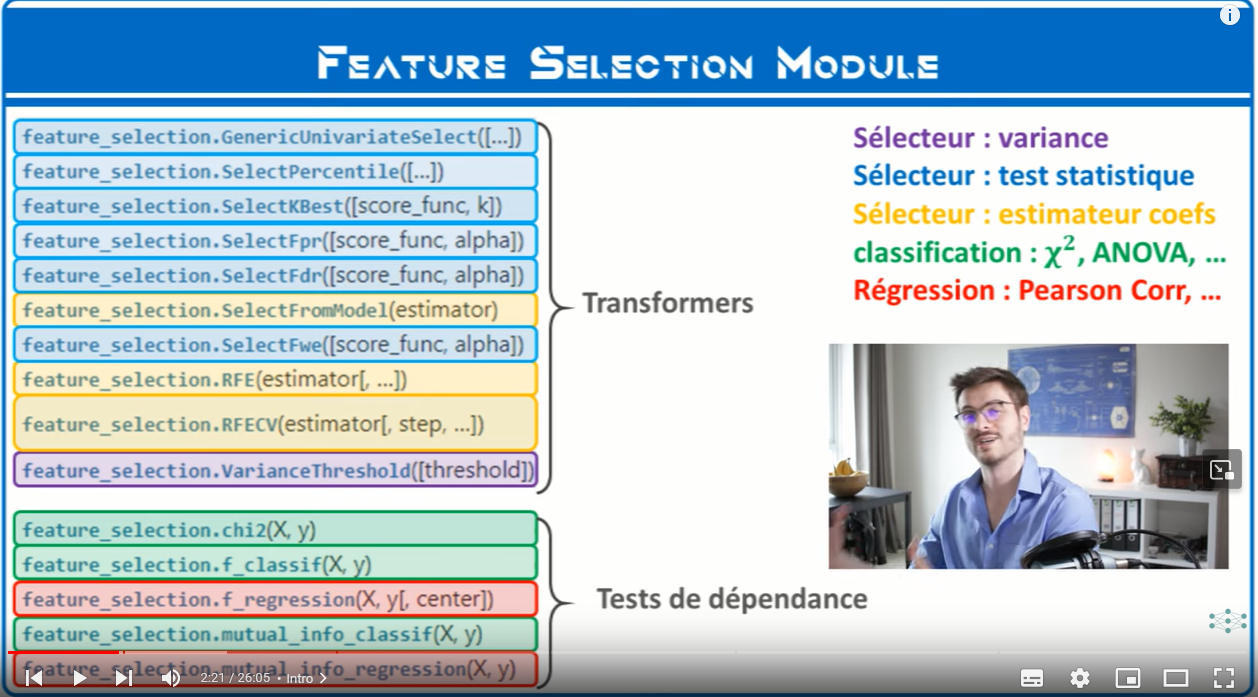

## VARIANCE THRESHOLD

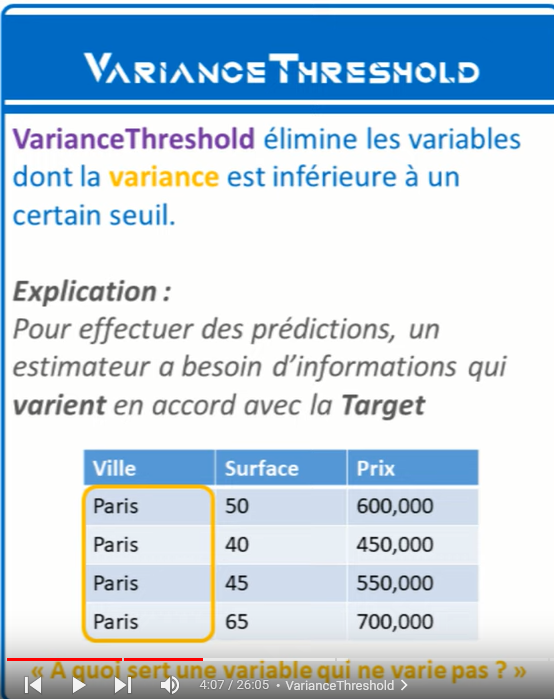

In [2]:
from sklearn.feature_selection import VarianceThreshold

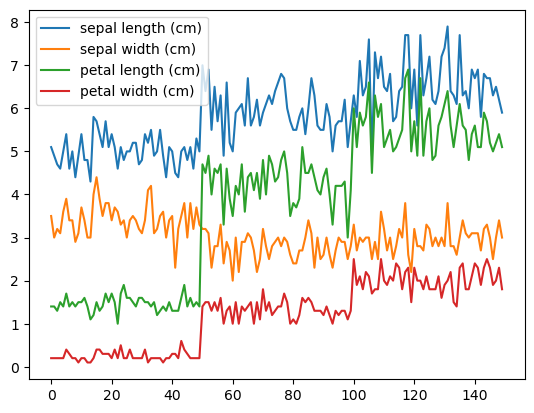

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [4]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [5]:
selector = VarianceThreshold(threshold=0.2)
selector.fit(X)

VarianceThreshold(threshold=0.2)

In [6]:
selector.get_support()

array([ True, False,  True,  True])

In [7]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

In [8]:
selector.variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

## SelectKBest

In [11]:
# sélectionne les k variables ayant le plus de dépendance avec la variable cible
from sklearn.feature_selection import SelectKBest, chi2

In [13]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [16]:
# retourne la variable ayant le plus de dépendance
selector = SelectKBest(chi2, k=1)
selector.fit_transform(X, y)
# renvoie le booléen ou le selector est vrai
selector.get_support()

array([False, False,  True, False])

## SelectFromModel

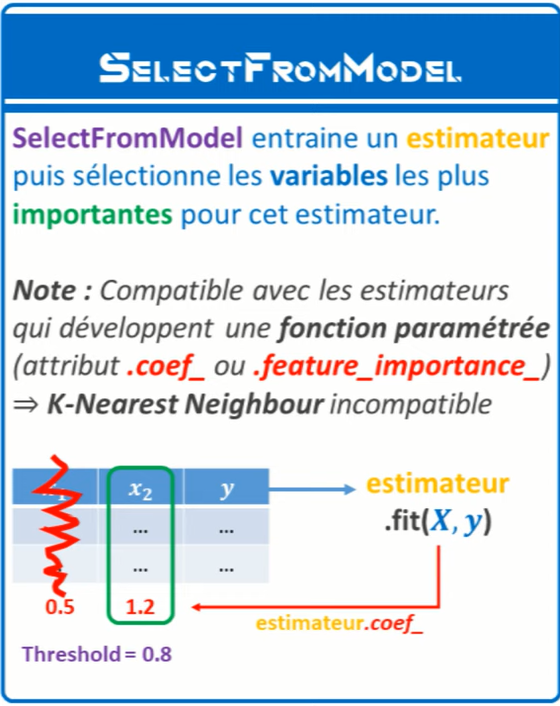

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [20]:
# va selectionner les coefficient superieur à la moyenne de tous les coefficient, on peut mettre la mediane aussi
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

In [22]:
# matrice coefficient du modele entre X et y, matrice (3,4), lien entre matrice X(150,4) et y(150,3) --> y version binaire
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

## Recursive feature Elimination

In [23]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier

In [25]:
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=2, cv=5)
selector.fit(X, y)
print(selector.ranking_)
print(selector.cv_results_)

[2 1 1 1]
{'mean_test_score': array([0.8       , 0.84666667, 0.77333333]), 'std_test_score': array([0.10540926, 0.08055364, 0.1289272 ]), 'split0_test_score': array([0.73333333, 0.73333333, 1.        ]), 'split1_test_score': array([0.93333333, 0.8       , 0.8       ]), 'split2_test_score': array([0.86666667, 0.9       , 0.76666667]), 'split3_test_score': array([0.83333333, 0.83333333, 0.63333333]), 'split4_test_score': array([0.63333333, 0.96666667, 0.66666667])}


In [26]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')